<a href="https://colab.research.google.com/github/harshavardhansannithi/ARDS-using-Machine-learning/blob/main/Random_Forest_vs_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [13]:
# Load your dataset (replace with your actual data)
data = pd.read_csv("/content/drive/MyDrive/survey lung cancer.csv")

# Separate features and target variable
X = data.drop("LUNG_RECRUITMENT", axis=1)
y = data["LUNG_RECRUITMENT"]

In [14]:
# Feature scaling (optional)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'column_name' is the column containing string values
le = LabelEncoder()
X['GENDER'] = le.fit_transform(X['GENDER'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [16]:
data["LUNG_RECRUITMENT"].describe()

count     309
unique      2
top       YES
freq      270
Name: LUNG_RECRUITMENT, dtype: object

In [17]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
dtypes: int64(15)
memory usage: 36.3 KB


In [18]:
X_scaled = scaler.fit_transform(X)

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [20]:
# Random Forest Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Experiment with hyperparameters
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [21]:
# KNN Model
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Experiment with different k values
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

In [22]:
# Assuming 'NO' is the negative class and 'YES' is the positive class
positive_class_label = 'YES'

print("Random Forest:")
score_rf = round(accuracy_score(y_test, y_pred_rf)*100,2)
print("The accuracy score achieved using RF is: "+str(score_rf)+" %")
print(f"Precision: {precision_score(y_test, y_pred_rf, pos_label=positive_class_label)}")
print(f"Recall: {recall_score(y_test, y_pred_rf, pos_label=positive_class_label)}")
print(f"F1-score: {f1_score(y_test, y_pred_rf, pos_label=positive_class_label)}")

Random Forest:
The accuracy score achieved using RF is: 97.85 %
Precision: 0.9883720930232558
Recall: 0.9883720930232558
F1-score: 0.9883720930232558


In [24]:
# Assuming y_test and y_pred_knn are your true labels and predicted labels for KNN
print("KNN:")
print(f"Precision: {precision_score(y_test, y_pred_knn, pos_label='YES')}")
print(f"Recall: {recall_score(y_test, y_pred_knn, pos_label='YES')}")
print(f"F1-score: {f1_score(y_test, y_pred_knn, pos_label='YES')}")

#Accuracy
score_knn = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

KNN:
Precision: 0.9651162790697675
Recall: 0.9651162790697675
F1-score: 0.9651162790697675
The accuracy score achieved using KNN is: 93.55 %


In [25]:
from sklearn.model_selection import cross_val_score

In [28]:
!pip install matplotlib

In [29]:
import matplotlib.pyplot as plt

The optimal n_estimators value is: 7


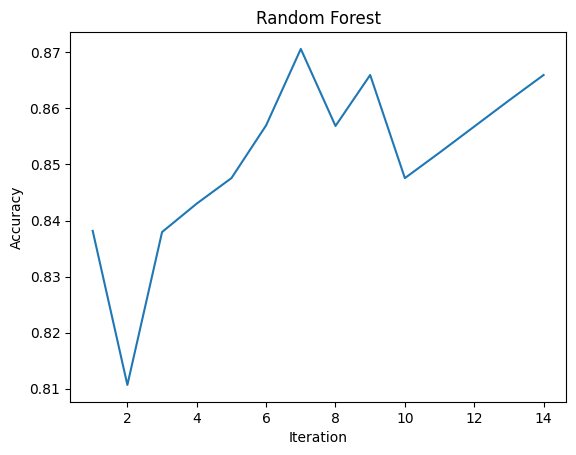

In [30]:
# Step 1: Import the NumPy module
!pip install numpy
import numpy as np

# Step 2: Re-run the code
# Assuming X_train and y_train are your training data and labels
# Perform cross-validation for different n_estimators values
n_estimators_values = list(range(1, 15))  # You can adjust the range based on your preference
cv_scores = []

for n_estimators in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Find the optimal n_estimators value with the highest cross-validated accuracy
optimal_n_estimators = n_estimators_values[np.argmax(cv_scores)]
print(f"The optimal n_estimators value is: {optimal_n_estimators}")

# Plotting the cross-validated accuracy for different n_estimators values (optional)
plt.plot(n_estimators_values, cv_scores)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Random Forest')
plt.show()

The optimal k value is: 8


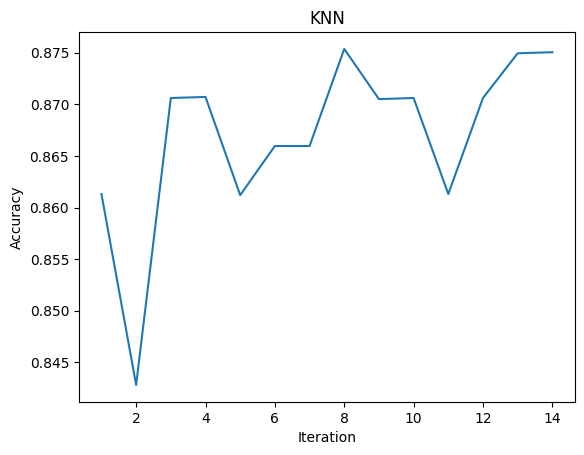

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data and labels
# Perform cross-validation for different k values
k_values = list(range(1, 15))  # You can adjust the range based on your preference
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Find the optimal k value with the highest cross-validated accuracy
optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal k value is: {optimal_k}")

# Plotting the cross-validated accuracy for different k values (optional)
plt.plot(k_values, cv_scores)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.show()


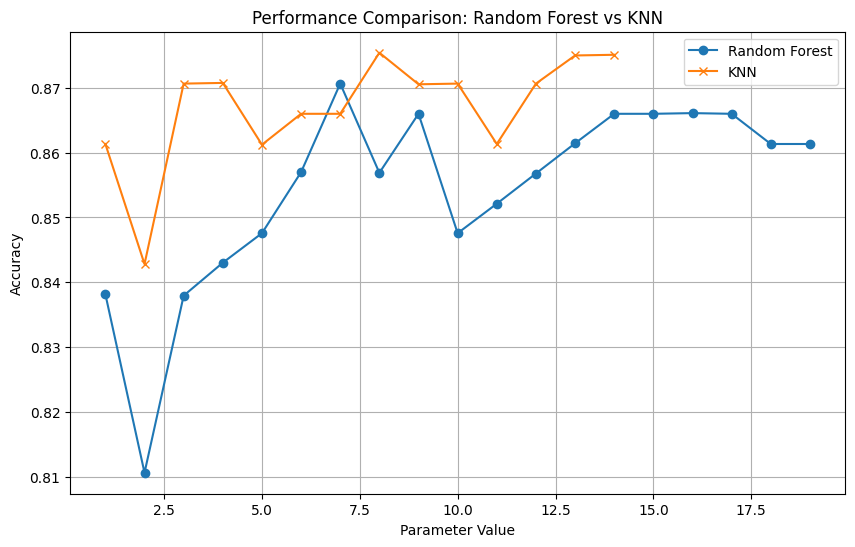

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Assuming X_train and y_train are your training data and labels

# Define the parameter values to evaluate
parameter_values_rf = list(range(1, 20))  # You can adjust the range based on your preference
parameter_values_knn = list(range(1, 15))  # You can adjust the range based on your preference

# Initialize lists to store performance metrics for Random Forest and KNN
rf_accuracy_scores = []
knn_accuracy_scores = []

# Evaluate models for each parameter value
for param_value in parameter_values_rf:
    # Random Forest
    rf = RandomForestClassifier(n_estimators=param_value, random_state=42)
    rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    rf_accuracy_scores.append(np.mean(rf_scores))

for param_value in parameter_values_knn:
    # K-Nearest Neighbors (KNN)
    knn = KNeighborsClassifier(n_neighbors=param_value)
    knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    knn_accuracy_scores.append(np.mean(knn_scores))

# Plotting the performance metrics
plt.figure(figsize=(10, 6))

# Plot Random Forest performance
plt.plot(parameter_values_rf, rf_accuracy_scores, label='Random Forest', marker='o')

# Plot KNN performance
plt.plot(parameter_values_knn, knn_accuracy_scores, label='KNN', marker='x')

plt.xlabel('Parameter Value')
plt.ylabel('Accuracy')
plt.title('Performance Comparison: Random Forest vs KNN')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
scores = [score_rf,score_knn]
algorithms = ["Random Forest","KNN"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest is: 97.85 %
The accuracy score achieved using KNN is: 93.55 %


In [37]:
import seaborn as sns

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

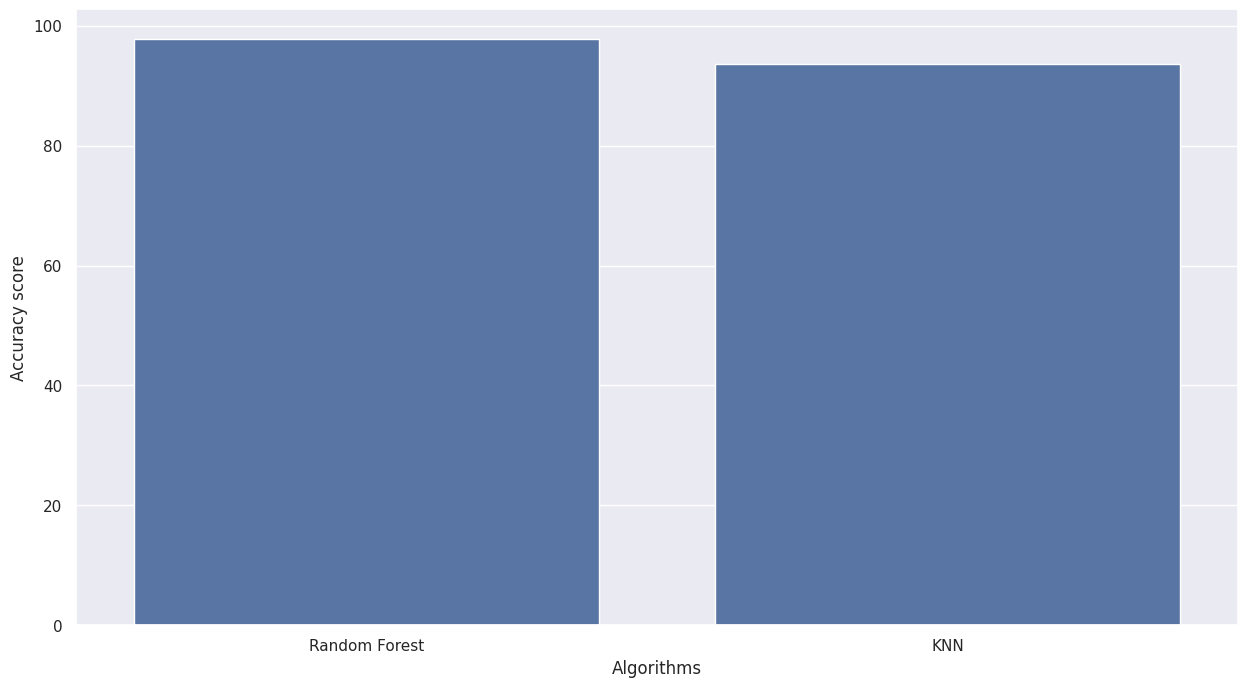

In [38]:
# Install the matplotlib module if necessary
!pip install matplotlib

# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Set the figure size
sns.set(rc={'figure.figsize':(15,8)})

# Set the x-axis label
plt.xlabel("Algorithms")

# Set the y-axis label
plt.ylabel("Accuracy score")

# Create a bar plot
sns.barplot(x=algorithms, y=scores)